# Titanic Survival Prediction
## LightGBM vs XGBoost

Cleaned submission notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df  = pd.read_csv('/content/Titanic_test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


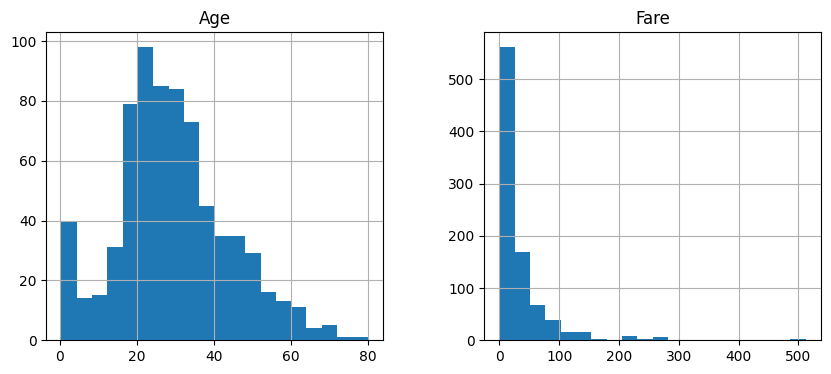

In [4]:
train_df[['Age','Fare']].hist(bins=20, figsize=(10,4))
plt.show()

In [5]:
full_df = pd.concat([train_df, test_df])
full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
full_df['Fare'].fillna(full_df['Fare'].median(), inplace=True)
full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace=True)
full_df.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)

for col in ['Sex','Embarked']:
    full_df[col] = LabelEncoder().fit_transform(full_df[col])

train_processed = full_df[:len(train_df)]
X = train_processed.drop('Survived', axis=1)
y = train_processed['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
lgbm = LGBMClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

lgbm.fit(X_train, y_train)
xgb.fit(X_train, y_train)

lgbm_pred = lgbm.predict(X_test)
xgb_pred = xgb.predict(X_test)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [8]:
def evaluate(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred)
    }

print("LightGBM:", evaluate(y_test, lgbm_pred))
print("XGBoost :", evaluate(y_test, xgb_pred))

LightGBM: {'Accuracy': 0.776536312849162, 'Precision': 0.7301587301587301, 'Recall': 0.6666666666666666, 'F1': 0.696969696969697}
XGBoost : {'Accuracy': 0.7541899441340782, 'Precision': 0.6984126984126984, 'Recall': 0.6376811594202898, 'F1': 0.6666666666666666}
